In [1]:
import os
import pickle
import importlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from skimage import exposure
from keras.models import Model
from keras.models import load_model
from keras.utils import to_categorical
os.chdir('C:/Users/Pierre Lavigne/Dropbox/Etude de Cas M2/Scripts') #Select your working directory
cwd = os.getcwd()
F=importlib.import_module("Functions")
Functions=importlib.reload(F)
#%%


model = load_model('first_model.hd5')

model.summary()
#%%



Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [6]:
(x_test, test_label) = F.load_pickled_data("C:/Users/Pierre Lavigne/Desktop/data/test.p", ['features', 'labels'])
x_test = x_test/255.

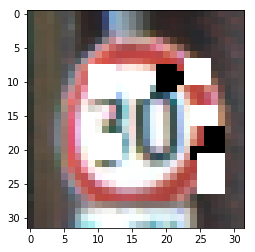

In [7]:
plt.imshow(F.sqr_noise(x_test_noisy,(5,25),(5,25),5)[1])
plt.show()

In [8]:
from keras.utils import to_categorical
target_test=to_categorical(test_label)

In [10]:
acc = []
for i in range(8):
    x_test_noisy = F.sqr_noise(x_test,(5,25),(5,25),i)
    x_test_noisy = x_test_noisy.astype('float32') 
    x_test_noisy= F.preprocess_dataset(x_test_noisy)
    acc.append(model.evaluate(x_test_noisy,target_test)[1])

12630/12630 [==============================] - 24s 2ms/step


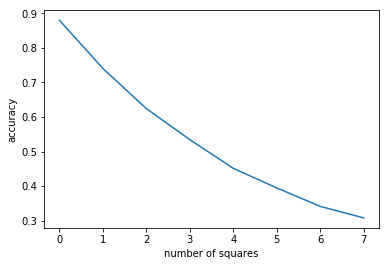

In [11]:
plt.plot(acc)
plt.xlabel('number of squares')
plt.ylabel('accuracy')
plt.show()